## Importing Libraries

In [8]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [9]:
model = tf.keras.models.load_model('trained_model.keras')

2024-05-09 11:01:20.529805: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24576000 exceeds 10% of free system memory.
2024-05-09 11:01:20.555965: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24576000 exceeds 10% of free system memory.
2024-05-09 11:01:20.564010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24576000 exceeds 10% of free system memory.
2024-05-09 11:01:20.653792: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24576000 exceeds 10% of free system memory.
2024-05-09 11:01:21.184631: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24576000 exceeds 10% of free system memory.
/home/dumping/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_st

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     6,145,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,786,582 (56.41 MB)

 Trainable params: 7,393,290 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,393,292 (28.20 MB)

### Visualizaing Single Image of Test set 

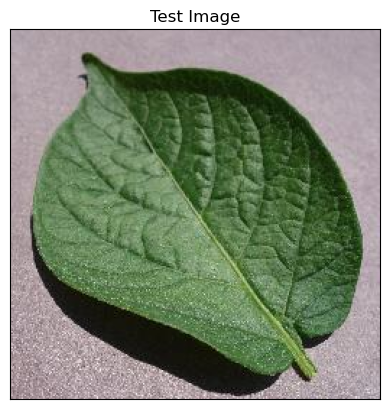

In [58]:
import cv2
image_path = "test/test/PotatoHealthy1.JPG"

#Reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR TO RGB

#Display image 
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model 

In [59]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [60]:
prediction = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [61]:
prediction, prediction.shape

(array([[1.3631444e-09, 2.1994024e-13, 6.1374784e-16, 1.3036176e-07,
         4.3931916e-08, 3.6237147e-08, 7.2030002e-07, 8.8603156e-16,
         6.4064517e-14, 1.3347161e-15, 1.8851795e-19, 2.8800931e-15,
         1.7909788e-13, 6.0008864e-16, 1.0050365e-14, 7.0751040e-12,
         4.2255872e-14, 1.4237796e-11, 1.0618676e-06, 4.1166131e-04,
         1.0846507e-08, 1.7102051e-05, 9.9955326e-01, 3.5453814e-07,
         1.4845432e-05, 1.2660034e-17, 2.1851437e-13, 7.8304225e-07,
         6.9075178e-20, 1.8481013e-10, 1.9049213e-12, 8.0019880e-12,
         1.6729051e-12, 1.4535490e-14, 1.2728108e-11, 4.6974594e-14,
         1.7899540e-17, 7.2388005e-11]], dtype=float32),
 (1, 38))

In [62]:
result_index = np.argmax(prediction)
result_index

22

In [63]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [64]:
class_name_french = [
  'Pomme : Tavelure du pommier',
  'Pomme : Pourriture noire',
  'Pomme : Rouille du pommier de cèdre',
  'Pomme : saine',
  'Myrtille : santé',
  'Cerise (y compris_aigre) : Oïdium',
  'Cerise (y compris_aigre) : saine',
  'Maïs : Tache cercosporéenne Tache grise',
  'Maïs : Rouille commune',
  'Maïs : Brûlure des feuilles du Nord',
  'Maïs : sain',
  'Cépage : Pourriture noire',
  'Cépage : Esca (Rougeole Noire)',
  'Raisin : Brûlure des feuilles (Tache des feuilles Isariopsis)',
  'Raisin : sain',
  'Orange : Haunglongbing (Verdissement des agrumes)',
  'Pêche : Tache bactérienne',
  'Pêche : saine',
  'Poivre : cloche Tache bactérienne',
  'Poivre : cloche saine',
  'Pomme de terre : Mildiou',
  'Pomme de terre : Mildiou',
  'Pomme de terre : saine',
  'Framboise : saine',
  'Soja : sain',
  'Courge : Oïdium',
  'Fraise : Brûlure des feuilles',
  'Fraise : saine',
  'Tomate : Tache bactérienne',
  'Tomate : Mildiou',
  'Tomate : Mildiou',
  'Tomate : Moisissure des Feuilles',
  'Tomate : tache septorienne',
  'Tomate : Acariens Tétranyque à deux points',
  'Tomate : Point Cible',
  'Tomate : Virus de l\'enroulement des feuilles jaunes de la tomate',
  'Tomate : Virus de la mosaïque de la tomate',
  'Tomate : saine'
]

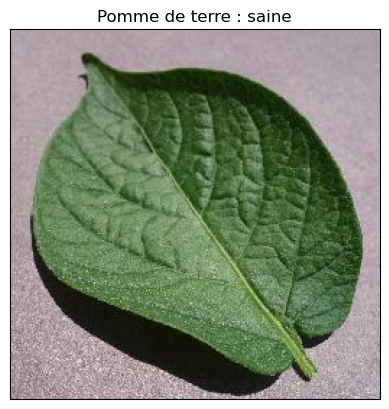

In [67]:
#Displaying Result of disease prediction
model_prediction = class_name_french[result_index]

plt.imshow(img)
plt.title(f"{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [68]:
model_prediction

'Pomme de terre : saine'